In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
#Add the columns of the dataset

column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']



In [ ]:
#Load the datasets
df = pd.read_csv("KDDTrain.csv", header=None, names = column_names)
df_test = pd.read_csv("KDDTest.csv", header=None, names = column_names)

print('Dimensions of the Training set: ', df.shape)
print('Dimensions of the Test set: ', df_test.shape)

Dimensions of the Training set:  (125973, 42)
Dimensions of the Test set:  (22544, 42)


In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# EXPORE THE DATASET

In [ ]:
#Explore dataset
print('Label Count for Training Set: ')
print(df['label'].value_counts())
print()
print('Label Count for Test Set: ')
print(df_test['label'].value_counts())

Label Count for Training Set: 
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label Count for Test Set: 
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack   

In [ ]:
#columns are categorical, not yet binary

print('Training set:')
for column_names in df.columns:
    if df[column_names].dtypes == 'object' :
        unique_cat = len(df[column_names].unique())
        print("Feature '{column_names}' has {unique_cat} categories".format(column_names=column_names, unique_cat=unique_cat))

print()
print('Label distribution: ')
print(df['service'].value_counts().sort_values(ascending=False).head())



Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Label distribution: 
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


# TEST AND TRAINING SET ABOVE AND BELOW

In [ ]:
#Test set
print('Test set:')
for column_names in df_test.columns:
    if df_test[column_names].dtypes == 'object' :
        unique_cat = len(df_test[column_names].unique())
        print("Feature '{column_names}' has {unique_cat} categories".format(column_names=column_names, unique_cat=unique_cat))

print()
print('Label distribution: ')
print(df_test['service'].value_counts().sort_values(ascending=False).head())


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories

Label distribution: 
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


# ONE HOT ENCODING PROCESS

In [ ]:
#LabelEncoder Insert categorical features into a 2D numpy array

categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()



,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
#Had to keep for One-Hot Encode

# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
#print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
#print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
#print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

In [ ]:
#Transform categorical features into numberes using LabelEncoder()
df_categorical_values_enc= df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
#One-Hot Encoding

encoder = OneHotEncoder(categories='auto')
df_categorical_values_encenc = encoder.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = encoder.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()



,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# MISSING COLOUMNS

In [ ]:
#Missing columns in the test set are added

trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference = [string + x for x in difference]
difference


['service_red_i',
 'service_http_2784',
 'service_aol',
 'service_urh_i',
 'service_harvest',
 'service_http_8001']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)


(125973, 84)
(22544, 84)


In [ ]:
#Add additional columns

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [ ]:
x = newdf.drop(['duration','land','wrong_fragment','urgent','num_failed_logins','logged_in','num_compromised',
                'num_file_creations','num_root','root_shell','su_attempted','num_shells','num_access_files',
                'num_outbound_cmds','is_host_login','is_guest_login','flag_S2','flag_S3','flag_SH','srv_rerror_rate',
                'service_csnet_ns','service_ctf','service_daytime','service_discard','service_domain','service_domain_u',
                'service_echo','service_eco_i','service_ecr_i','service_efs','service_exec','service_finger','service_ftp',
                'service_ftp_data','service_gopher','service_netbios_ns','service_ldap','service_kshell','service_klogin',
                'service_iso_tsap','service_imap4','service_http_443','service_hostnames','service_netbios_dgm','service_name',
                'service_mtp','service_login','service_link','service_pop_3','service_pop_2','service_pm_dump','service_other',
                'service_ntp_u','service_nntp','service_nnsp','service_netstat','service_netbios_ssn','service_ssh',
                'service_sql_net','service_sunrpc','service_smtp','service_shell','service_rje','service_remote_job',
                'service_private','service_printer','service_uucp_path','service_uucp','service_urp_i','service_time',
                'service_tim_i','service_tftp_u','service_telnet','service_systat','service_supdup','dst_host_count',
                'srv_diff_host_rate','diff_srv_rate','flag_S0','flag_S1','rerror_rate','flag_RSTR','flag_RSTOS0','flag_RSTO',
                'flag_REJ','flag_OTH','service_whois','service_vmnet','srv_serror_rate','serror_rate','service_urh_i',
                'service_red_i','service_harvest','service_http_2784','dst_host_srv_rerror_rate','dst_host_rerror_rate',
                'dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate','Protocol_type_tcp',
                'Protocol_type_udp','service_IRC','service_X11','service_Z39_50','service_auth','service_bgp','service_courier',
                'service_http_8001','service_aol'], axis=1)

x_test =newdf_test.drop(['duration','land','wrong_fragment','urgent','num_failed_logins','logged_in','num_compromised',
                         'num_file_creations','num_root','root_shell','su_attempted','num_shells','num_access_files',
                         'num_outbound_cmds','is_host_login','is_guest_login','flag_S2','flag_S3','flag_SH','srv_rerror_rate',
                         'service_csnet_ns','service_ctf','service_daytime','service_discard','service_domain','service_domain_u',
                         'service_echo','service_eco_i','service_ecr_i','service_efs','service_exec','service_finger','service_ftp',
                         'service_ftp_data','service_gopher','service_netbios_ns','service_ldap','service_kshell','service_klogin',
                         'service_iso_tsap','service_imap4','service_http_443','service_hostnames','service_netbios_dgm','service_name',
                         'service_mtp','service_login','service_link','service_pop_3','service_pop_2','service_pm_dump','service_other',
                         'service_ntp_u','service_nntp','service_nnsp','service_netstat','service_netbios_ssn','service_ssh',
                         'service_sql_net','service_sunrpc','service_smtp','service_shell','service_rje','service_remote_job',
                         'service_private','service_printer','service_uucp_path','service_uucp','service_urp_i','service_time',
                         'service_tim_i','service_tftp_u','service_telnet','service_systat','service_supdup','dst_host_count',
                         'srv_diff_host_rate','diff_srv_rate','flag_S0','flag_S1','rerror_rate','flag_RSTR','flag_RSTOS0','flag_RSTO',
                         'flag_REJ','flag_OTH','service_whois','service_vmnet','srv_serror_rate','serror_rate','service_urh_i',
                         'service_red_i','service_harvest','service_http_2784','dst_host_srv_rerror_rate','dst_host_rerror_rate',
                         'dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate','Protocol_type_tcp',
                         'Protocol_type_udp','service_IRC','service_X11','service_Z39_50','service_auth','service_bgp','service_courier',
                         'service_http_8001','service_aol'], axis=1)

# STANDARDIZATION / SPLIT / SCALE

In [ ]:
#standardization

# Split dataframes into X & Y

X_Df = x.drop('label', axis=1)
Y_Df = newdf.label

# test set
X_Df_test = x_test.drop('label', axis=1)
Y_Df_test = newdf_test.label

In [ ]:
X_Df.shape


(125973, 13)

In [ ]:
#columns saved for later use

colNames = list(X_Df)
colNames_test = list(X_Df_test)


In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_Df)
X_Df=scaler1.transform(X_Df)

#test data
scaler2 = preprocessing.StandardScaler().fit(X_Df_test)
X_Df_test=scaler2.transform(X_Df_test)

X_Df_test = X_Df.astype('float32')
Y_Df_test= Y_Df_test.astype('float32')


In [ ]:
y_binary = to_categorical(Y_Df)
y_test_binary = to_categorical(Y_Df_test)

# RANDOM FOREST

## SUPPORT VECTOR MACHINE

# DNN

In [ ]:
#Create the neural network

dnn = Sequential()
dnn.add(Dense(units=512, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.3))
dnn.add(Dense(units=256, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.2))
dnn.add(Dense(units=128, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dense(units=10, kernel_initializer='normal'))
dnn.add(Dense(units=2, activation='softmax'))



In [ ]:
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="modeldnn.h5", verbose=0, save_best_only=True)

In [ ]:
dnn.fit(X_Train, y_binary, epochs=50, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/50
886/886 [==============================] - 14s 16ms/step - loss: 0.0263 - accuracy: 0.9887 - val_loss: 0.0277 - val_accuracy: 0.9886
Epoch 2/50
886/886 [==============================] - 15s 16ms/step - loss: 0.0265 - accuracy: 0.9888 - val_loss: 0.0464 - val_accuracy: 0.9890
Epoch 3/50
886/886 [==============================] - 15s 17ms/step - loss: 0.0264 - accuracy: 0.9890 - val_loss: 0.0310 - val_accuracy: 0.9875
Epoch 4/50
886/886 [==============================] - 17s 19ms/step - loss: 0.0264 - accuracy: 0.9886 - val_loss: 0.0715 - val_accuracy: 0.9890
Epoch 5/50
886/886 [==============================] - 15s 17ms/step - loss: 0.0262 - accuracy: 0.9890 - val_loss: 0.0251 - val_accuracy: 0.9892
Epoch 6/50
886/886 [==============================] - 17s 19ms/step - loss: 0.0262 - accuracy: 0.9889 - val_loss: 0.1014 - val_accuracy: 0.9892
Epoch 7/50
886/886 [==============================] - 15s 17ms/step - loss: 0.0264 - accuracy: 0.9888 - val_loss: 0.0864 - val_accuracy:

In [ ]:
loss, results = dnn.evaluate(X_Test, Y_Test, verbose=1)

print(f'Test loss: {loss}')
print(f'Test accuracy: {results}')

705/705 [==============================] - 2s 3ms/step - loss: 7.7053 - accuracy: 0.5978
Test loss: 7.705332279205322
Test accuracy: 0.5978087186813354


In [ ]:
#Precision, Recall, FI-Score, and ROC-AUC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

#predict probabiliites for test set
y_prediction = dnn.predict(X_Test, verbose=0)
y_pred_classes = np.argmax(y_prediction, axis=1)

y_true_classes = Y_Test

#accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy *100:.2f}%')

print(classification_report(y_true_classes, y_pred_classes))

#ROC_AUC
auc = roc_auc_score(y_true_classes, y_pred_classes)
print(f'ROC AUC: {auc *100:.2f}%', '\n')

confusion = confusion_matrix(y_true_classes, y_pred_classes)
print('Confusion:')
print(confusion)


Accuracy: 77.44%
              precision    recall  f1-score   support

         0.0       0.67      0.93      0.78      9711
         1.0       0.93      0.66      0.77     12833

    accuracy                           0.77     22544
   macro avg       0.80      0.79      0.77     22544
weighted avg       0.82      0.77      0.77     22544

ROC AUC: 79.36% 

Confusion:
[[9051  660]
 [4426 8407]]


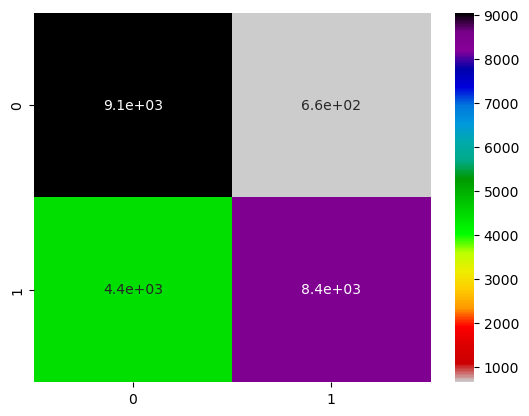

In [ ]:
import seaborn as sns

axes = sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')